In [1]:
import jieba
from collections import Counter
import matplotlib.pyplot as plt

from matplotlib import colors
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

%matplotlib inline

In [2]:
class HighFreqWordExtract(object):
    def __init__(self, file_path, stop_word_file_path, top_k):
        self.file_path = file_path
        self.stop_word_file_path = stop_word_file_path
        self.top_k = top_k

    def load_file(self):
        """
        把一个文本文件转为一字符串，条件是：去掉空格和换行符。
        :return:
        """
        out_string = ""
        with open(self.file_path, encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                content = line.strip()
                out_string += content

        return out_string

    def prepare_stop_words(self):
        """
        停用词转成一个列表，每个词是一个元素
        :return:
        """
        stop_word_list = []
        with open(self.stop_word_file_path, encoding="utf-8") as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                stop_word_list.append(line)

        return stop_word_list

    def word_segment(self, waited_segment_string, stop_word_list):
        # 分词
        # print("/".join(jieba.cut(waited_segment_string)))
        segment_result = jieba.lcut(waited_segment_string)
        # print(segment_result)
        # 去掉属于停用词的部分。
        # 列表的遍历删除，逆向进行。
        for i in range(len(segment_result) - 1, -1, -1):
            if segment_result[i] in stop_word_list:
                segment_result.pop(i)

        return Counter(segment_result).most_common(self.top_k)

    def draw_from_dict(self, dict_data):
        color_list = ["r", "g", "b", "#FF8C00", "#32CD32", "#4169E1", "#F08080", "#FFD700",
                      "#00FFFF", "#BA55D3", "#FF4500", "#7FFF00", "#DC143C", "#33b864",
                      "#8e82fe", "#33b864", "#fc5a50", "#ffff81", "#510ac9", "#a2a415",
                      "#fafe4b", "#63f7b4", "#c48efd", "#f43605", "#b6c406"]
        x_label = []
        y_label = []

        for d in dict_data.items():
            x_label.append(d[0])
            y_label.append(d[1])

        # print(x_label)
        # print(y_label)
        x_label = x_label[::-1]
        y_label = y_label[::-1]
        # print(x_label)
        # print(y_label)
        # plt.bar(x_label, y_label, color="rgb")
        plt.barh(x_label, y_label, color=color_list[0:self.top_k])
        for a, b in zip(y_label, x_label):
            plt.text(a, b, '%.0f' % int(a), ha='left', va='bottom', fontsize=14)
        plt.show()

In [3]:
def main():
    # file = "data/test"
    # 1 创建一个高频词提取对象
    h = HighFreqWordExtract("./倚天屠龙记.txt", "./停用词.txt", 15)
    # 2 加载要提取的文件
    word = h.load_file()

    # 3 对文件进行分词
    stop_word = h.prepare_stop_words()

    # 4 使用停用词进行过滤
    result = h.word_segment(word, stop_word)
    # 5 排序，计算top k

    result_dict = dict(result)
    print(result_dict)
    # print(type(result_dict))

    h.draw_from_dict(result_dict)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.669 seconds.
Prefix dict has been built succesfully.


{'张无忌': 4667, '张翠山': 1146, '谢逊': 1003, '武功': 909, '周芷若': 828, '教主': 777, '赵敏': 764, '派': 755, '心中': 711, '一声': 686, '想': 682, '只见': 636, '少林': 617, '弟子': 593, '明教': 585}


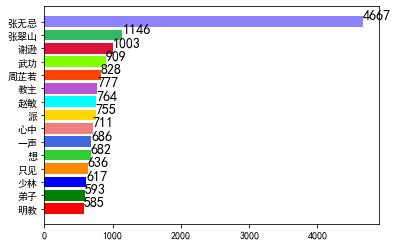

In [4]:
main()

In [5]:
def main1():
    # file = "data/test"
    # 1 创建一个高频词提取对象
    h = HighFreqWordExtract("./神雕侠侣.txt", "./停用词.txt", 15)
    # 2 加载要提取的文件
    word = h.load_file()

    # 3 对文件进行分词
    stop_word = h.prepare_stop_words()

    # 4 使用停用词进行过滤
    result = h.word_segment(word, stop_word)
    # 5 排序，计算top k

    result_dict = dict(result)
    print(result_dict)
    # print(type(result_dict))

    h.draw_from_dict(result_dict)


{'杨过': 4602, '小龙女': 2018, '李莫愁': 1016, '武功': 947, '心中': 881, '郭靖': 878, '郭': 797, '黄蓉': 796, '一声': 738, '想': 732, '法王': 723, '瞧': 709, '不知': 705, '二人': 690, '心想': 627}


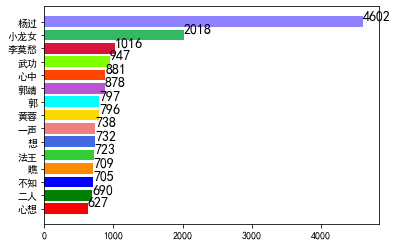

In [6]:
main1()

In [7]:
def main2():
    # file = "data/test"
    # 1 创建一个高频词提取对象
    h = HighFreqWordExtract("./笑傲江湖.txt", "./停用词.txt", 15)
    # 2 加载要提取的文件
    word = h.load_file()

    # 3 对文件进行分词
    stop_word = h.prepare_stop_words()

    # 4 使用停用词进行过滤
    result = h.word_segment(word, stop_word)
    # 5 排序，计算top k

    result_dict = dict(result)
    print(result_dict)
    # print(type(result_dict))

    h.draw_from_dict(result_dict)


{'令狐冲': 5037, '派': 1857, '岳不群': 1184, '师父': 1035, '剑法': 1033, '盈盈': 1010, '剑': 995, '弟子': 955, '林平之': 929, '岳灵珊': 919, '一声': 844, '恒山': 795, '笑': 767, '长剑': 751, '想': 725}


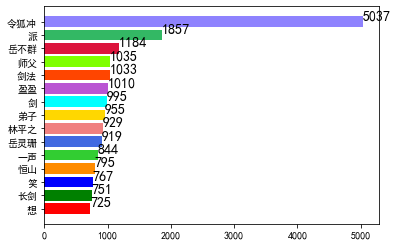

In [8]:
main2()

In [9]:
def main3():
    # file = "data/test"
    # 1 创建一个高频词提取对象
    h = HighFreqWordExtract("./天龙八部.txt", "./停用词.txt", 15)
    # 2 加载要提取的文件
    word = h.load_file()

    # 3 对文件进行分词
    stop_word = h.prepare_stop_words()

    # 4 使用停用词进行过滤
    result = h.word_segment(word, stop_word)
    # 5 排序，计算top k

    result_dict = dict(result)
    print(result_dict)
    # print(type(result_dict))

    h.draw_from_dict(result_dict)

{'段誉': 1936, '虚竹': 1517, '萧峰': 1275, '武功': 1068, '想': 1027, '一声': 908, '乔峰': 865, '王语嫣': 859, '慕容复': 845, '瞧': 833, '师父': 792, '心中': 786, '不知': 782, '杀': 772, '段正淳': 758}


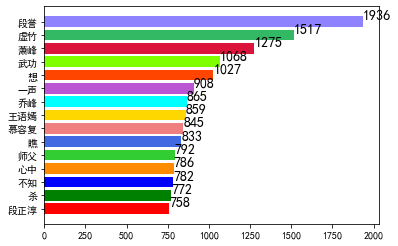

In [10]:
main3()